# Importing Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/customer-personality-analysis/marketing_campaign.csv


# Linear Regression

Müşteri segmentasyonu için kullanmaya uygun olan veri setini kullanarak bir linear regresyon uygulaması yaptım. Bu verisetini lineer regresyon için uygun hale getirmek için, var olan çeşitli ürünlerden satın alma miktarlarını kullanarak müşterinin toplam alışveriş miktarı özelliğini oluşturdum.

Hedef: Müşteriye ait verileri kullanarak altın ürünlerine yapacağı harcamayı tahmin etmek.

In [2]:
data = pd.read_csv("../input/customer-personality-analysis/marketing_campaign.csv", sep="\t")
data.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [3]:
data.drop("ID", axis=1, inplace=True)

In [4]:
data["years"] = 2022 - pd.to_datetime(data["Dt_Customer"]).dt.year.astype("int")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [7]:
dummy = pd.get_dummies(data[["Education","Marital_Status"]], drop_first=True, dtype="int")

In [8]:
dummy

,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,0,1,0,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2235,0,1,0,0,0,0,1,0,0,0,0
2236,0,0,0,1,0,0,0,0,1,0,0
2237,0,1,0,0,0,1,0,0,0,0,0
2238,0,0,1,0,0,0,0,0,1,0,0


In [9]:
data.drop(["Education", "Marital_Status"], axis=1, inplace=True)
data = pd.concat([data, dummy], axis=1)
data.head()

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1957,58138.0,0,0,04-09-2012,58,635,88,546,172,...,1,0,0,0,0,0,1,0,0,0
1,1954,46344.0,1,1,08-03-2014,38,11,1,6,2,...,1,0,0,0,0,0,1,0,0,0
2,1965,71613.0,0,0,21-08-2013,26,426,49,127,111,...,1,0,0,0,0,0,0,1,0,0
3,1984,26646.0,1,0,10-02-2014,26,11,4,20,10,...,1,0,0,0,0,0,0,1,0,0
4,1981,58293.0,1,0,19-01-2014,94,173,43,118,46,...,0,0,1,0,0,1,0,0,0,0


In [10]:
data["Age"] = 2022 - data["Year_Birth"]
data.drop(["Year_Birth", "Dt_Customer"], axis=1, inplace=True)

In [11]:
data.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'years', 'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Age'],
      dtype='object')

In [12]:
data["Total_Purch"] = data["MntWines"] + data["MntFruits"] + data["MntMeatProducts"] + data["MntFishProducts"] + data["MntSweetProducts"] + data["MntGoldProds"]

In [13]:
data.fillna(data["Income"].describe()["mean"], axis=1, inplace=True)
data.isnull().sum()

Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
years                      0
Education_Basic            0
Education_Graduation       0
Education_Master           0
Education_PhD              0
Marital_Status_Alone       0
Marital_Status_Divorced    0
Marital_Status_Married     0
Marital_Status_Single      0
Marital_Status_Together    0
Marital_Status

In [14]:
X = data.drop("MntGoldProds", axis=1).values
y = data["MntGoldProds"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [16]:
linear_r = LinearRegression()
linear_r.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = linear_r.predict(X_test)
print("MSE: ",mean_squared_error(y_test, y_pred))

MSE:  1.2120439972328448e-24


In [18]:
linear_r.coef_

array([ 3.65447760e-17, -1.89674665e-13, -2.66472741e-14, -7.97307983e-16,
       -1.00000000e+00, -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
       -1.00000000e+00, -3.26737510e-15, -5.22408386e-15,  2.85005938e-15,
        3.34694086e-15,  5.75143791e-16, -2.26969960e-14,  7.47868888e-15,
       -1.27708190e-14, -8.95705487e-15, -1.35611509e-14,  7.00067748e-15,
       -3.90312782e-18, -6.07153217e-18,  7.22037902e-15, -3.32225863e-16,
       -6.92539041e-14, -1.09582795e-15, -5.31589238e-15, -6.76760673e-16,
       -4.35020028e-14, -4.75324644e-14, -4.06817430e-14, -5.02516492e-14,
       -4.64234797e-14, -4.47321034e-14, -6.92976597e-14,  1.27794910e-15,
        1.00000000e+00])

In [19]:
linear_r.rank_

35

In [20]:
linear_r.singular_

array([8.46449454e+05, 1.70863553e+04, 7.14334152e+03, 2.73827214e+03,
       1.24014654e+03, 1.15135086e+03, 1.07000542e+03, 6.62639339e+02,
       4.49362587e+02, 1.03096836e+02, 8.79653775e+01, 7.28095955e+01,
       6.86883854e+01, 5.28115258e+01, 2.48371502e+01, 2.25744088e+01,
       2.20705214e+01, 1.91794502e+01, 1.77190249e+01, 1.71872860e+01,
       1.49798399e+01, 1.37744463e+01, 1.32729289e+01, 1.05410415e+01,
       8.68853373e+00, 8.14189482e+00, 7.85893620e+00, 7.36343744e+00,
       7.09092747e+00, 4.60340729e+00, 4.06373287e+00, 3.90695777e+00,
       1.58716273e+00, 1.07692425e+00, 5.05435395e-01, 9.39429116e-11,
       9.39429116e-11])

In [21]:
linear_r.intercept_

-1.5276668818842154e-12

In [22]:
compare = pd.DataFrame()
compare["prediction"] = y_pred.astype("int")
compare["true"] = y_test
compare.head(20)

,prediction,true
0,5,5
1,133,133
2,43,43
3,58,58
4,25,26
5,72,72
6,261,262
7,107,107
8,4,4
9,3,4


In [23]:
data["index"] = np.arange(0, len(data), 1)

<AxesSubplot:xlabel='Income', ylabel='Total_Purch'>

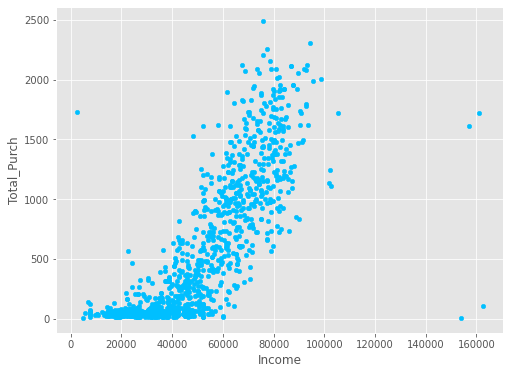

In [24]:
data[:1000].plot(figsize=(8,6), kind="scatter", color="deepskyblue", x="Income", y="Total_Purch")

# Logistic Regression

In [25]:
titanic_train = pd.read_csv("../input/titanic/train.csv")
titanic_test = pd.read_csv("../input/titanic/test.csv")

titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
titanic = pd.concat([titanic_train, titanic_test], axis=0)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
titanic["Embarked"].fillna("S")
dummy = pd.get_dummies(titanic[["Embarked","Sex"]], dtype="int")
titanic.drop(["Ticket","Name","Cabin","Embarked","Sex"], axis=1, inplace=True)
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Age          1046 non-null   float64
 4   SibSp        1309 non-null   int64  
 5   Parch        1309 non-null   int64  
 6   Fare         1308 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 81.8 KB


In [29]:
train = titanic.loc[titanic["Survived"].notnull()]
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    int64  
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 55.7 KB


In [30]:
test = titanic.loc[titanic["Survived"].isnull()]
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     0 non-null      float64
 2   Pclass       418 non-null    int64  
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 26.1 KB


In [31]:
test.drop("Survived", axis=1, inplace=True)

In [32]:
train.fillna(train["Age"].describe()["mean"], axis=1, inplace=True)

In [33]:
test.fillna(test["Age"].describe()["mean"], axis=1, inplace=True)

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 22.9 KB


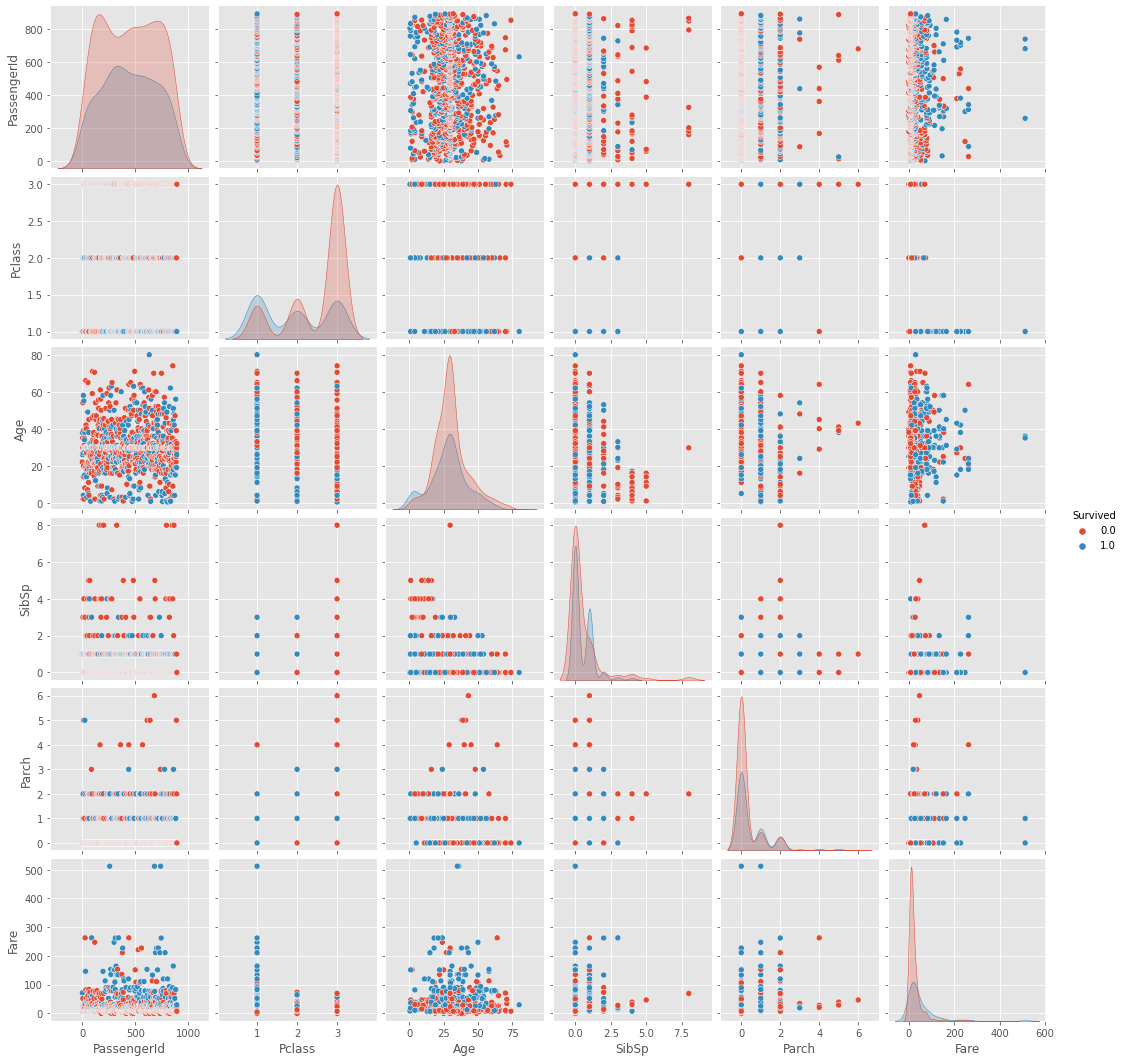

In [35]:
sns.pairplot(train, hue="Survived")
plt.show()

In [36]:
X_train, X_val, y_train, y_val = train_test_split(train.drop("Survived", axis=1), train["Survived"], test_size=0.3, random_state=17)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_val_pred = log_reg.predict(X_val)

In [38]:
print("Accuracy: ",accuracy_score(y_train,log_reg.predict(X_train)))

Accuracy:  0.6982343499197432


In [39]:
print("Accuracy: ",accuracy_score(y_val,y_val_pred))

Accuracy:  0.6865671641791045
